<a href="https://colab.research.google.com/github/TomasKricka/MPA-MLF/blob/main/final_project/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project
## MPA-MLF
**Tomas Kricka**


In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.7 MB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl

from keras.utils import to_categorical, plot_model, model_to_dot
from sklearn.neighbors import KNeighborsClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
x_train = np.load("/content/drive/My Drive/MLF/final project/x_train_all_4.npy")
x_test =  np.load("/content/drive/My Drive/MLF/final project/x_test_all_4.npy")
y_train = pd.read_csv("/content/drive/My Drive/MLF/Final_dataset/Dataset/y_train.csv")

In [67]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

print(x_train.max())
print(x_test.max())
print(y_train.max())

(3549, 44, 52)
(8279, 44, 52)
(8279, 2)
43007.0
43967.0
id        8278
target       3
dtype: int64


In [4]:
x_test_pred = x_test

clasess = 3

x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.2)
y_train = y_train.drop("id", axis = 1)
y_test = y_test.drop("id", axis = 1)

In [5]:
#x_train_scaled = ((x_train-x_train.min())/(x_train.max()-x_train.min()))
x_train_scaled = x_train.astype('float32') / x_train.max()
y_train = y_train - 1
y_train_encoded = to_categorical(y_train, num_classes=clasess)

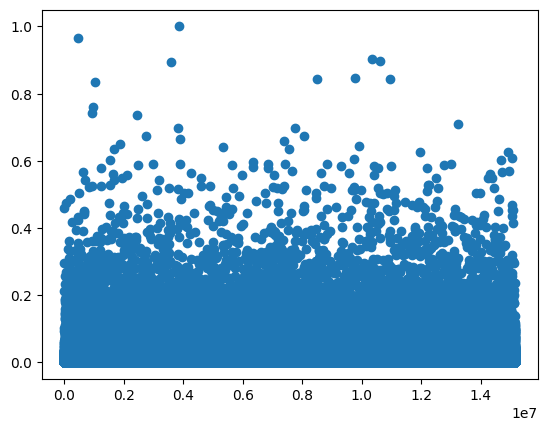

In [26]:
#plt.figure()
#plt.plot(history.history['loss'], label="loss")
#plt.plot(history.history['val_loss'], label="val_loss")
#plt.legend(loc="upper right")
#plt.xlabel('n epochs')
#plt.ylabel('val_loss, loss')
#plt.show()

x_train_scaled_res = np.reshape(x_train_scaled, (1,1,15153424))
x_mat = []

for x in range(15153424):
  x_mat.append(x)

#x_mat_res = np.reshape(x_mat, (1,1,15153424))

plt.figure()
plt.scatter(x_mat,x_train_scaled_res)

plt.show()




In [111]:
model = Sequential()
model.add(Flatten(input_shape=(44, 52)))      
model.add(Dense(1024, activation='relu'))
#model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(clasess, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 2288)              0         
                                                                 
 dense_42 (Dense)            (None, 1024)              2343936   
                                                                 
 dense_43 (Dense)            (None, 512)               524800    
                                                                 
 dense_44 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 2,870,275
Trainable params: 2,870,275
Non-trainable params: 0
_________________________________________________________________


In [112]:
optimizer = Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [113]:
history = model.fit(x_train_scaled, y_train_encoded, epochs=150, batch_size=64, validation_split = 0.2)

Epoch 1/150
83/83 [==============================] - 1s 6ms/step - loss: 0.6828 - accuracy: 0.6842 - val_loss: 0.4682 - val_accuracy: 0.8272
Epoch 2/150
83/83 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.8654 - val_loss: 0.3533 - val_accuracy: 0.8679
Epoch 3/150
83/83 [==============================] - 0s 4ms/step - loss: 0.2473 - accuracy: 0.9109 - val_loss: 0.2820 - val_accuracy: 0.8898
Epoch 4/150
83/83 [==============================] - 0s 4ms/step - loss: 0.2077 - accuracy: 0.9198 - val_loss: 0.3213 - val_accuracy: 0.8845
Epoch 5/150
83/83 [==============================] - 0s 4ms/step - loss: 0.1411 - accuracy: 0.9490 - val_loss: 0.2063 - val_accuracy: 0.9313
Epoch 6/150
83/83 [==============================] - 0s 4ms/step - loss: 0.0983 - accuracy: 0.9645 - val_loss: 0.1917 - val_accuracy: 0.9366
Epoch 7/150
83/83 [==============================] - 0s 4ms/step - loss: 0.0693 - accuracy: 0.9758 - val_loss: 0.1514 - val_accuracy: 0.9547
Epoch 8/150
8

In [114]:
#x_test_scaled = abs((x_test-x_test.min())/(x_test.max()-x_test.min()))
x_test_scaled = x_test.astype('float32') / x_test.max()
y_test = y_test - 1
y_test_encoded = to_categorical(y_test, num_classes=clasess)

score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')
print(y_test_encoded.shape)

Test loss: 0.29362398386001587
Test accuracy: 96.55796885490417 %
(1656, 3)


In [115]:
#x_test_pred_scaled = abs((x_test_pred-x_test_pred.min())/(x_test_pred.max()-x_test_pred.min()))
x_test_pred_scaled = x_test_pred.astype('float32') / x_test_pred.max()


pred_val = model.predict([x_test_pred_scaled])

df = pd.DataFrame(pred_val)

row_numb = df.shape[0]

pred_numbs = np.argmax(pred_val, axis=1)
pred_numbs_res = pred_numbs.reshape ((row_numb,1))


print(row_numb)

pred_numbs_res = pred_numbs_res + 1
print(pred_numbs_res)

df = pd.DataFrame(pred_numbs_res)
df.columns = ["target"]
df.to_csv('filename.csv') 
#files.download('filename.csv')



111/111 [==============================] - 0s 2ms/step
3549
[[2]
 [2]
 [1]
 ...
 [1]
 [1]
 [1]]


In [116]:
from google.colab import files


files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

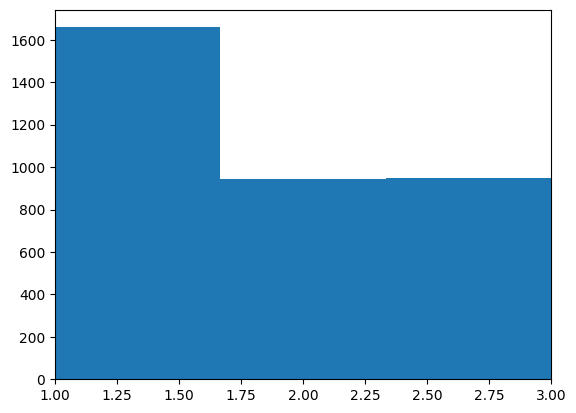

In [117]:
plt.figure()
plt.hist(pred_numbs_res, bins=3)
plt.xlim([1,3])
plt.show()

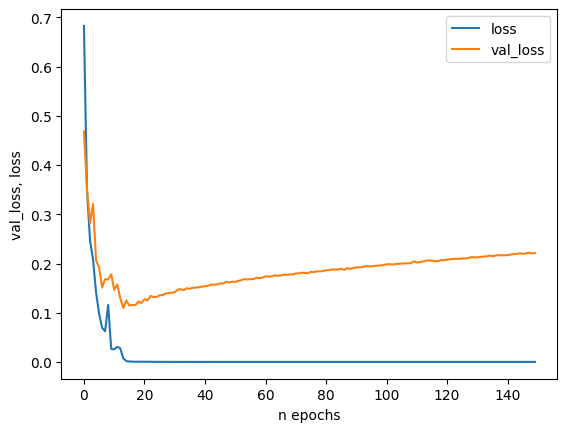

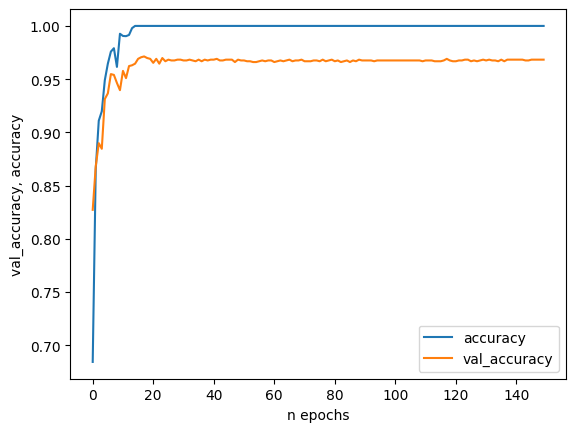

In [118]:
plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc="upper right")
plt.xlabel('n epochs')
plt.ylabel('val_loss, loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="lower right")
plt.xlabel('n epochs')
plt.ylabel('val_accuracy, accuracy')
plt.show()